<a href="https://colab.research.google.com/github/varunhiremath/coding/blob/master/ML/sklearn/ScikitRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook explores different regression models available in the scikit learn library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Load the data set. We use the housing price data set from Kaggle.

In [5]:
# read data
data = pd.read_csv('train.csv')

Drop columns containing null values. Find the top 10 features with highest correlation to the target feature 'SalePrice'.

In [6]:
# drop na columns
data = data.dropna(axis=1)

target = 'SalePrice'
sale_price_corr = data.corrwith(data[target],numeric_only=True)
top_corr_cols = sale_price_corr.sort_values(ascending=False)[1:11]

Extract data, normalize, and split the data into 60% train and 40% test.

In [7]:
# pick top features
features = top_corr_cols.index

X = data[features]
y = data[target]

# normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)

Test Linear Regression Model

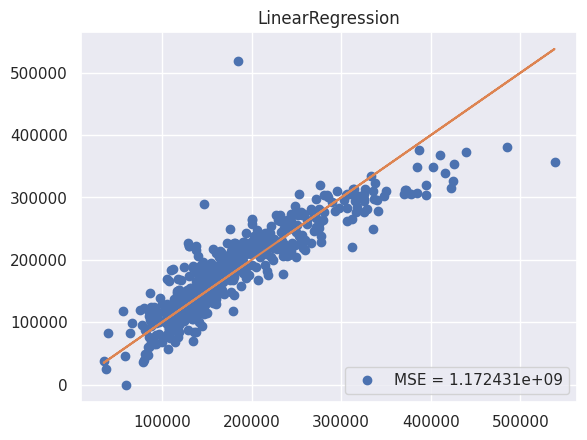

In [24]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

y_lin_reg = lin_reg_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_lin_reg)

sns.set()
plt.figure(1)
plt.plot(y_test, y_lin_reg,'o', label="MSE = %e" % mse_lr)
plt.plot(y_test, y_test,'-')
plt.title('LinearRegression')
plt.legend()
plt.savefig('images/LinearRegression.png')

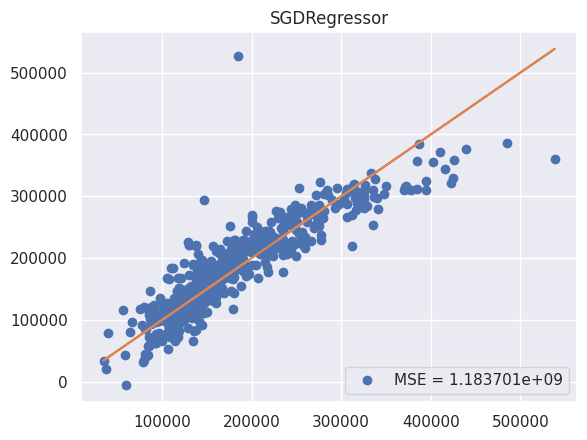

In [21]:
# SGD Regressor
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)

y_sgd = sgd_model.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_sgd)

plt.figure(2)
plt.plot(y_test, y_sgd,'o', label="MSE = %e" % mse_sgd)
plt.plot(y_test, y_test,'-')
plt.title('SGDRegressor')
plt.legend()
plt.savefig('images/SGDRegressor.png')

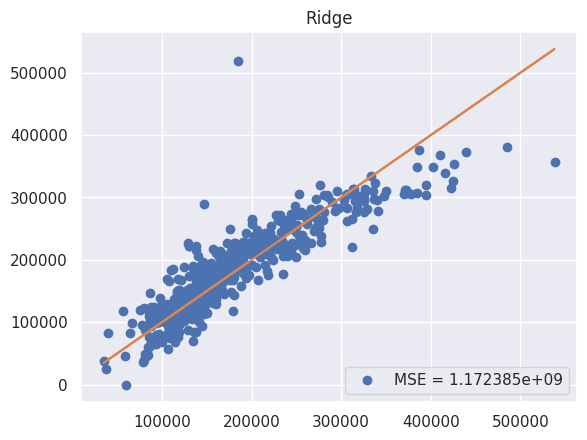

In [22]:
# Ridge Model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)

y_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge)

plt.figure(3)
plt.plot(y_test, y_ridge,'o', label="MSE = %e" % mse_ridge)
plt.plot(y_test, y_test,'-')
plt.title('Ridge')
plt.legend()
plt.savefig('images/Ridge.png')

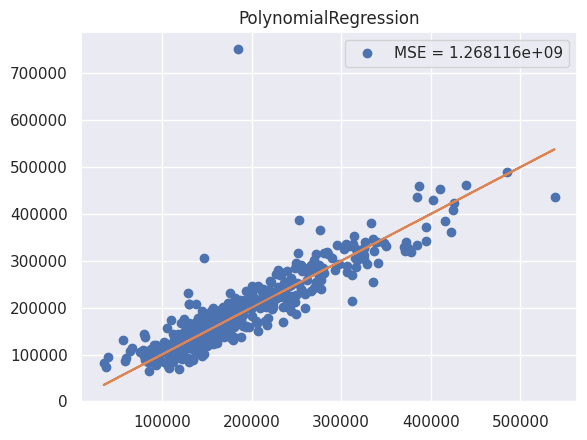

In [23]:
# Polynomial Regression
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('ridge', Ridge(alpha=0.1))])
poly_model.fit(X_train,y_train)

y_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_poly)

plt.figure(4)
plt.plot(y_test, y_poly,'o', label="MSE = %e" % mse_poly)
plt.plot(y_test, y_test,'-')
plt.title('PolynomialRegression')
plt.legend()
plt.savefig('images/PolynomialRegression.png')

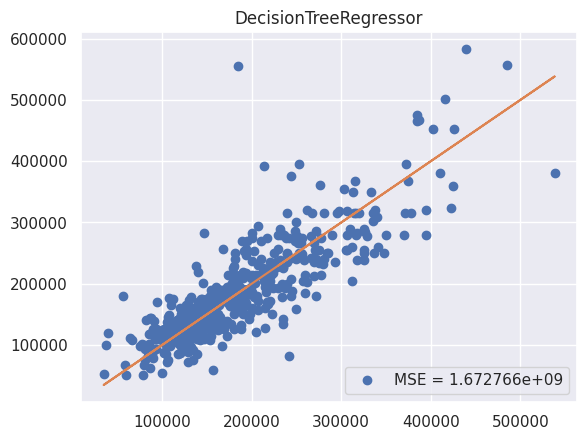

In [19]:
# Decision Tree
dcr_model = DecisionTreeRegressor()
dcr_model.fit(X_train, y_train)

y_dcr = dcr_model.predict(X_test)
mse_dcr = mean_squared_error(y_test, y_dcr)

plt.figure(5)
plt.plot(y_test, y_dcr,'o', label="MSE = %e" % mse_dcr)
plt.plot(y_test, y_test,'-')
plt.title('DecisionTreeRegressor')
plt.legend()
plt.savefig('images/DecisionTreeRegressor.png')

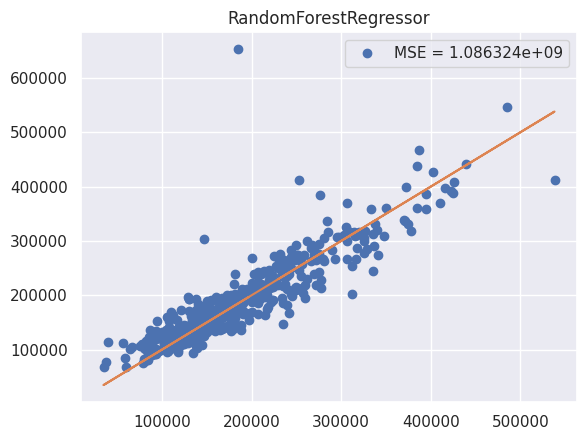

In [18]:
# Random Forest
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

y_rfr = rfr_model.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_rfr)

plt.figure(6)
plt.plot(y_test, y_rfr,'o', label="MSE = %e" % mse_rfr)
plt.plot(y_test, y_test,'-')
plt.title('RandomForestRegressor')
plt.legend()
plt.savefig('images/RandomForestRegressor.png')